In [24]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [25]:
df = pd.read_csv('/content/s&p500.txt',
                     date_parser=lambda dt: pd.to_datetime(dt, format='%Y-%m-%d'),
                     index_col = 0).dropna()

In [26]:
df.head()

,A,AA,AAPL,ABC,ABT,ADBE,ADI,ADM,ADP,ADSK,AEE,AEP,AES,AFL,AGN,AIG,AIV,AKAM,AKS,ALL,AMAT,AMD,AMGN,AMT,AMZN,AN,ANDV,ANF,AON,APA,APC,APD,APH,APOL,ARG,ATGE,AVB,AVY,AXP,AZO,...,9876566D,9876641D,ATI,AVP,BBBY,BF/B,BIG,BMS,BRK/B,CSC,CVC,DD,DOW,EMC,HSH,ITT,JCP,LXK,MDP,NYT,ODP,PBI,PLL,R,RDC,RRD,RSHCQ,SIAL,SLM,SPLS,STJ,SVU,SWY,TEG,TER,TGNA,THC,X,MAR.1,SPX
2000-01-27,46.1112,78.9443,3.9286,4.5485,13.7898,15.6719,48.0313,10.8844,39.5477,8.1250,32.9375,33.5625,37.9375,20.5938,39.688,1175.5873,26.8393,281.1250,10.8125,23.1875,33.8750,18.4688,61.375,38.375,66.938,6.9956,5.9688,22.0000,26.438,16.1797,16.3750,28.5441,4.4961,9.5278,8.2500,17.6875,34.028,68.4375,47.5423,27.000,...,19.5599,12.8050,14.4083,11.4488,13.4716,4.8330,14.0345,9.4613,33.92,33.4641,21.1925,32.4610,20.9983,50.0103,15.1495,4.1638,14.4539,75.9783,22.8012,36.4422,9.7551,19.9370,14.5667,14.9107,19.8697,14.2389,40.6249,14.6727,3.8908,10.9498,5.5918,86.6178,26.3983,11.3873,65.8677,22.1921,60.9705,20.7086,12.2457,1398.56
2000-01-28,45.8585,77.8245,3.6295,4.5485,14.2653,14.3906,47.7500,10.7143,38.5627,7.7188,32.3125,33.0000,38.1875,21.0000,40.250,1139.2866,26.8393,270.0625,11.0000,22.8125,32.4375,17.6250,59.688,37.813,61.688,7.1084,5.7813,22.2500,25.875,16.0714,16.4375,27.5618,4.2852,9.4722,8.2500,17.6875,33.605,66.5000,46.1746,26.188,...,19.0395,12.0992,14.1983,10.9371,13.4108,4.7948,12.9819,9.5376,33.20,33.3474,19.9290,31.2734,20.2378,47.2899,14.9440,4.1147,13.7079,77.7273,22.2126,35.9092,9.6347,19.5572,14.1666,14.5737,19.1865,14.0360,39.0624,13.9816,3.7626,10.3198,5.4520,82.4218,27.4137,11.2230,60.3487,21.7558,62.3032,20.1183,12.0742,1360.16
2000-01-31,44.5952,78.0345,3.7054,4.3968,14.5730,13.7656,46.7500,10.6576,37.3807,7.6406,32.5625,33.5000,40.0625,21.7188,40.313,1165.8141,26.9281,249.1250,10.1250,23.1875,34.3125,18.0000,63.688,35.875,64.563,6.8263,5.5000,21.3750,25.875,15.8009,16.4063,27.3884,4.2422,9.6111,7.7500,18.4375,33.363,67.7500,48.0712,26.250,...,19.4298,13.5780,14.0303,10.8519,13.2283,4.8821,13.3328,9.6139,32.92,34.3282,19.5451,31.1414,20.5464,49.6630,15.1495,4.1474,14.6404,77.5730,21.9771,35.4246,9.6347,21.2661,14.1188,14.8685,20.6667,14.2389,39.4152,14.2474,3.8053,11.4298,5.5499,86.3181,28.2444,11.0862,62.1484,22.0533,60.6373,19.5772,12.1722,1394.46
2000-02-01,47.8377,80.7640,3.5804,4.5333,14.7128,13.9688,49.0000,10.8844,37.9717,7.9219,32.5625,33.6875,40.3750,22.1563,41.375,1143.4751,26.9726,239.0625,9.9375,23.0625,35.1250,18.2813,65.313,38.750,67.438,6.3750,5.5000,20.8125,26.313,16.4232,17.1250,28.3130,4.2148,10.7500,7.4375,18.6250,33.363,67.0625,49.3113,26.313,...,19.7767,14.0149,13.9463,10.9158,14.9617,4.8384,13.5667,9.6330,33.50,33.3240,19.5611,31.6033,21.1416,48.4475,15.0468,4.1311,14.0343,78.9105,21.5062,35.9576,9.7551,21.5102,13.9273,14.7001,20.6667,14.6445,37.0967,14.8588,3.9702,11.3098,5.4240,83.0212,28.7982,11.1683,67.3674,22.2120,60.4708,19.5772,12.5151,1409.28
2000-02-02,51.5434,83.4934,3.5290,4.5788,14.7968,15.3281,48.1250,10.6576,35.9032,7.9688,32.5625,33.6250,39.6563,22.1875,42.813,1142.7770,26.9281,233.6250,10.0000,23.3125,35.9531,18.0313,63.688,39.250,69.438,5.9237,5.4688,21.1250,27.313,16.3961,16.2500,28.0818,4.3047,10.5556,7.5000,18.6875,33.363,66.6250,47.9071,25.813,...,19.4948,14.0485,13.1061,10.9798,14.9921,4.8439,13.8591,9.5758,32.80,32.1097,20.2169,32.0651,20.3039,50.0103,14.9954,4.1229,13.7079,83.1286,21.6239,35.5700,9.8154,20.6965,14.0709,14.8685,20.4390,14.7662,37.3487,14.3006,3.8114,11.8798,5.3541,81.5226,28.6136,11.1956,68.9271,22.6483,62.4698,19.5281,12.3192,1409.12


In [47]:
df.shape

(3493, 419)

In [27]:
df1 = df.drop(['SPX'], axis=1)
df_spx = df['SPX']
asset_prices_tickers = df1.sample(n=15,axis='columns')

In [28]:
asset_prices = pd.concat([asset_prices_tickers, df_spx], axis=1) 
asset_prices.head()

,UPS,HAS,FISV,ROK,BMS,SJM,LH,AGN,KSS,VRSN,WFC,NBL,DUK,FDX,AMAT,SPX
2000-01-27,65.125,15.5000,11.6042,19.334,9.4613,19.442,8.125,39.688,35.5000,175.0156,19.5000,5.1250,50.5426,40.7500,33.8750,1398.56
2000-01-28,64.938,15.5000,10.9167,19.235,9.5376,19.178,8.438,40.250,34.4063,164.4688,19.3750,5.0000,49.7785,38.6875,32.4375,1360.16
2000-01-31,60.000,15.0000,11.3125,19.607,9.6139,18.517,8.281,40.313,35.0625,161.3750,20.0000,5.0156,50.4334,39.5625,34.3125,1394.46
2000-02-01,61.375,15.2500,11.4583,19.607,9.6330,18.517,8.281,41.375,36.5625,169.4375,20.2188,5.3281,50.2697,38.9375,35.1250,1409.28
2000-02-02,58.250,15.6875,12.1250,19.235,9.5758,18.517,8.438,42.813,36.8750,175.0625,19.5000,5.2813,49.3964,38.5625,35.9531,1409.12


In [29]:
#asset_prices = asset_prices.drop(['SPX'], axis=1)

In [30]:
asset_returns = asset_prices.pct_change()
asset_returns.head()

,UPS,HAS,FISV,ROK,BMS,SJM,LH,AGN,KSS,VRSN,WFC,NBL,DUK,FDX,AMAT,SPX
2000-01-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-28,-0.002871,0.000000,-0.059246,-0.005121,0.008064,-0.013579,0.038523,0.014160,-0.030808,-0.060262,-0.006410,-0.024390,-0.015118,-0.050613,-0.042435,-0.027457
2000-01-31,-0.076042,-0.032258,0.036256,0.019340,0.008000,-0.034467,-0.018606,0.001565,0.019072,-0.018811,0.032258,0.003120,0.013156,0.022617,0.057803,0.025218
2000-02-01,0.022917,0.016667,0.012888,0.000000,0.001987,0.000000,0.000000,0.026344,0.042781,0.049961,0.010940,0.062306,-0.003246,-0.015798,0.023679,0.010628
2000-02-02,-0.050916,0.028689,0.058185,-0.018973,-0.005938,0.000000,0.018959,0.034755,0.008547,0.033198,-0.035551,-0.008784,-0.017372,-0.009631,0.023576,-0.000114


In [31]:
normed_returns = (asset_returns - asset_returns.mean()) / asset_returns.std()
normed_returns.head()

,UPS,HAS,FISV,ROK,BMS,SJM,LH,AGN,KSS,VRSN,WFC,NBL,DUK,FDX,AMAT,SPX
2000-01-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-28,-0.208010,-0.027399,-2.793323,-0.250095,0.455900,-0.881940,1.840213,0.634856,-1.373065,-1.569592,-0.258045,-1.037468,-0.913090,-2.537188,-1.434447,-2.098603
2000-01-31,-5.093287,-1.598928,1.657595,0.783994,0.452002,-2.180924,-0.954416,0.043463,0.822762,-0.497915,1.165526,0.084841,0.768739,1.093415,1.934495,1.903871
2000-02-01,1.513750,0.784557,0.568521,-0.033618,0.088663,-0.037487,-0.044241,1.206912,1.866457,1.280117,0.380703,2.499379,-0.206906,-0.811107,0.787615,0.795259
2000-02-02,-3.415779,1.370231,2.679583,-0.835719,-0.390171,-0.037487,0.883189,1.601860,0.359430,0.846722,-1.330862,-0.400780,-1.047185,-0.505363,0.784133,-0.020920


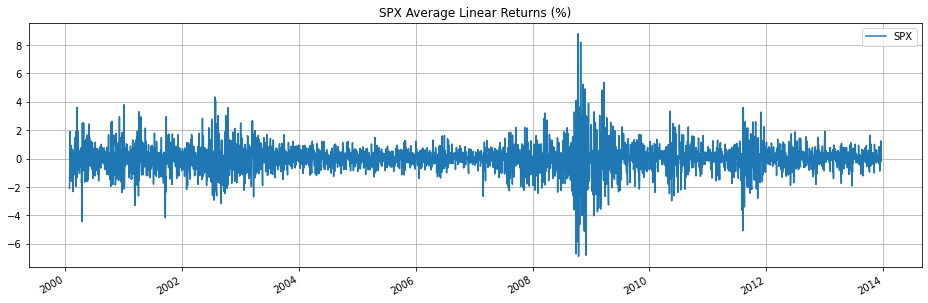

In [32]:
# Visualizing Log Returns for the SPX
plt.figure(figsize=(16, 5))
plt.title("SPX Average Linear Returns (%)")
normed_returns.SPX.plot()
plt.grid(True);
plt.legend()
plt.show()

In [33]:
stocks = normed_returns.drop(['SPX'], axis=1)
n_stocks = len(stocks)

In [34]:
stocks.head()

,UPS,HAS,FISV,ROK,BMS,SJM,LH,AGN,KSS,VRSN,WFC,NBL,DUK,FDX,AMAT
2000-01-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-28,-0.208010,-0.027399,-2.793323,-0.250095,0.455900,-0.881940,1.840213,0.634856,-1.373065,-1.569592,-0.258045,-1.037468,-0.913090,-2.537188,-1.434447
2000-01-31,-5.093287,-1.598928,1.657595,0.783994,0.452002,-2.180924,-0.954416,0.043463,0.822762,-0.497915,1.165526,0.084841,0.768739,1.093415,1.934495
2000-02-01,1.513750,0.784557,0.568521,-0.033618,0.088663,-0.037487,-0.044241,1.206912,1.866457,1.280117,0.380703,2.499379,-0.206906,-0.811107,0.787615
2000-02-02,-3.415779,1.370231,2.679583,-0.835719,-0.390171,-0.037487,0.883189,1.601860,0.359430,0.846722,-1.330862,-0.400780,-1.047185,-0.505363,0.784133


In [35]:
 from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(normed_returns, test_size=0.33, random_state=42)

In [36]:
X_train.head()

,UPS,HAS,FISV,ROK,BMS,SJM,LH,AGN,KSS,VRSN,WFC,NBL,DUK,FDX,AMAT,SPX
2009-12-31,-0.945833,-0.583225,-0.630019,-0.212831,-1.112286,-0.783753,-0.349530,-0.277651,-0.982843,-0.410625,0.211301,-0.428275,-0.730904,-1.029105,-0.295078,-0.775909
2007-11-23,0.726178,0.208213,0.132084,0.205413,0.628697,0.147379,0.712399,0.967887,1.028448,-0.067738,1.109958,0.754728,0.226138,0.993829,0.607938,1.271136
2008-10-15,-4.394383,-2.432394,-5.368049,-4.546337,-5.738763,-1.453965,-1.666944,-3.532544,-4.635717,-3.109289,-0.208763,-6.854969,-3.457174,-3.874975,-3.276881,-6.877536
2009-11-25,0.306464,0.929490,0.345304,-0.469554,1.035132,0.324448,-0.234404,0.933123,1.398480,0.185690,-0.061695,0.560240,0.668639,1.008641,0.209482,0.329954
2001-01-04,0.534910,3.052436,-0.404992,0.193490,-1.406898,0.307356,-4.316049,-1.371564,4.251686,-1.209319,-0.801662,-1.362123,-2.366257,3.835932,-3.563854,-0.814120


In [37]:
X_test.head()

,UPS,HAS,FISV,ROK,BMS,SJM,LH,AGN,KSS,VRSN,WFC,NBL,DUK,FDX,AMAT,SPX
2007-10-26,-0.016299,-0.294253,0.881167,0.205266,-0.204572,1.104466,-0.016087,-0.123718,0.463986,0.467620,0.783717,0.184294,0.272295,0.279271,-0.876233,1.035362
2013-06-18,0.670338,0.450869,0.365554,0.569842,0.195248,0.215509,0.121350,0.244312,-0.275530,-0.108883,0.186454,0.634074,0.496145,0.511163,0.396443,0.579718
2010-08-13,-0.057717,0.316650,-0.445334,0.056927,0.093882,0.198687,-0.310168,0.196090,-1.446347,-0.173674,-0.248605,0.368709,-0.326900,-0.717644,0.021886,-0.318027
2007-07-26,-0.463098,-1.183797,-3.304497,-0.582202,-1.866322,0.188655,-1.267024,-0.498104,-1.298677,-0.562189,-1.001796,-0.982267,-0.384127,-0.927705,-0.240016,-1.785676
2011-02-03,0.209139,1.308708,-0.181262,-0.181438,1.185373,1.029479,0.300827,0.705091,0.252077,0.307511,0.011703,-0.083702,0.416722,0.332477,-0.439906,0.166594


In [38]:
from sklearn.decomposition import PCA

cov_matrix = X_train.loc[:,X_train.columns != 'SPX'].cov()
pca = PCA()
pca.fit(cov_matrix)
pd.Series(pca.explained_variance_ratio_).to_frame('Explained Variance').head().style.format('{:,.2%}'.format)

,Explained Variance
0,25.00%
1,14.84%
2,8.88%
3,8.43%
4,7.22%


In [39]:
print(cov_matrix)

           UPS       HAS      FISV  ...       DUK       FDX      AMAT
UPS   1.086054  0.423077  0.455243  ...  0.297018  0.740062  0.410419
HAS   0.423077  0.961911  0.309997  ...  0.181801  0.409416  0.308024
FISV  0.455243  0.309997  0.988035  ...  0.293691  0.431201  0.451710
ROK   0.565571  0.429620  0.419350  ...  0.327114  0.569606  0.405685
BMS   0.538875  0.393010  0.476144  ...  0.358602  0.538324  0.374795
SJM   0.324466  0.235371  0.314625  ...  0.250063  0.311853  0.238920
LH    0.316663  0.211046  0.311684  ...  0.255716  0.256713  0.271367
AGN   0.300281  0.233883  0.248333  ...  0.222248  0.283400  0.201918
KSS   0.466245  0.388595  0.366946  ...  0.258570  0.459281  0.328617
VRSN  0.376583  0.233713  0.389016  ...  0.156006  0.319118  0.508658
WFC   0.485194  0.322658  0.406254  ...  0.284220  0.509837  0.313895
NBL   0.385460  0.277910  0.323399  ...  0.335270  0.373916  0.266646
DUK   0.297018  0.181801  0.293691  ...  1.041811  0.274514  0.196983
FDX   0.740062  0.40

In [40]:
top4 = pd.DataFrame(pca.components_[:4], columns=cov_matrix.columns)
top4

,UPS,HAS,FISV,ROK,BMS,SJM,LH,AGN,KSS,VRSN,WFC,NBL,DUK,FDX,AMAT
0,-0.446808,-0.218118,-0.164157,-0.352652,-0.308687,0.044293,0.199870,0.109844,-0.249882,-0.017264,-0.366979,-0.083325,0.115624,-0.468797,-0.121316
1,0.030289,0.011539,0.194556,-0.086418,-0.106512,-0.190434,0.169645,-0.103313,0.013934,0.560435,-0.150348,-0.320508,-0.421858,-0.023531,0.498435
2,-0.072333,0.258332,-0.084172,-0.086227,-0.083214,0.562902,-0.605131,0.174789,-0.002845,-0.030503,-0.128699,-0.193815,-0.370500,-0.022648,0.012071
3,0.064943,0.412534,-0.331733,-0.041126,-0.119677,-0.389472,0.259138,0.384510,0.264677,-0.180895,-0.058597,-0.134983,-0.355557,0.056250,-0.280770


In [41]:
eigen_portfolios = top4.div(top4.sum(1), axis=0)
eigen_portfolios

,UPS,HAS,FISV,ROK,BMS,SJM,LH,AGN,KSS,VRSN,WFC,NBL,DUK,FDX,AMAT
0,0.191898,0.093679,0.070504,0.151460,0.132578,-0.019023,-0.085842,-0.047177,0.107321,0.007415,0.157613,0.035787,-0.049659,0.201343,0.052104
1,0.399008,0.152011,2.562989,-1.138430,-1.403143,-2.508683,2.234826,-1.360992,0.183555,7.382900,-1.980615,-4.222224,-5.557362,-0.309980,6.566140
2,0.107639,-0.384428,0.125258,0.128315,0.123831,-0.837663,0.900504,-0.260106,0.004233,0.045392,0.191519,0.288420,0.551346,0.033702,-0.017963
3,-0.144076,-0.915205,0.735949,0.091237,0.265502,0.864042,-0.574897,-0.853033,-0.587185,0.401315,0.129996,0.299459,0.788801,-0.124791,0.622886


In [42]:
eigen_portfolios.index = [f'Portfolio {i}' for i in range(1, 5)]

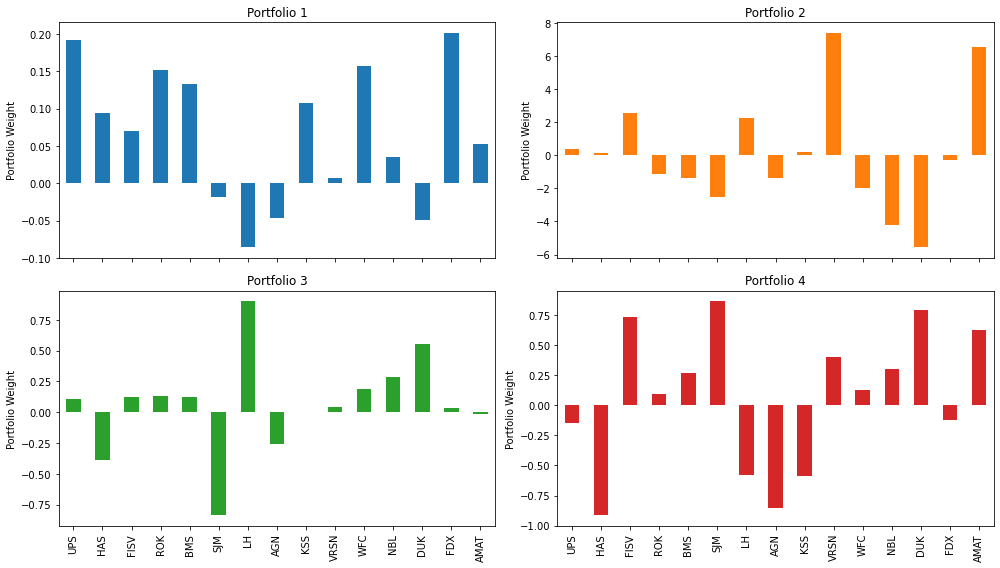

In [43]:
import seaborn as sns
axes = eigen_portfolios.T.plot.bar(subplots=True,
                                   layout=(2, 2),
                                   figsize=(14, 8),
                                   legend=False)
for ax in axes.flatten():
    ax.set_ylabel('Portfolio Weight')
    ax.set_xlabel('')
plt.tight_layout()

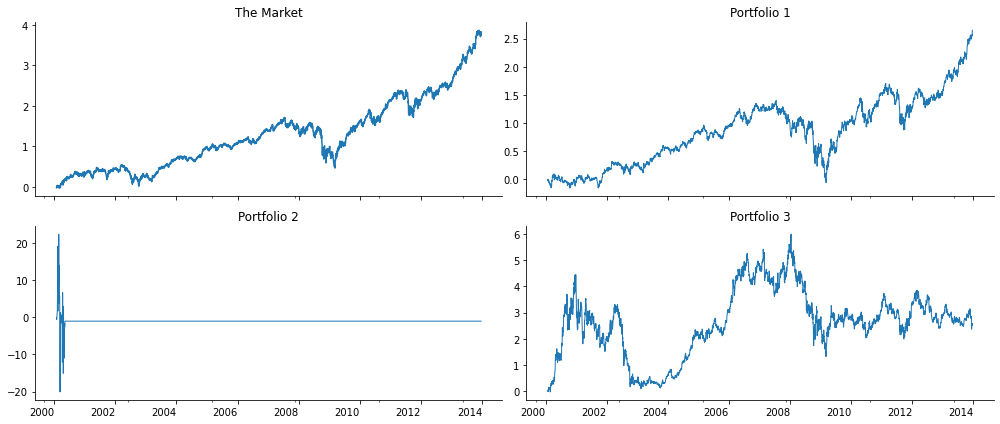

In [44]:
#Performance analysis

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 6), sharex=True)
axes = axes.flatten()
#asset_returns['SPX'].sum(1).add(1).cumprod().sub(1).plot(title='The Market', ax=axes[0])
asset_returns.mean(1).add(1).cumprod().sub(1).plot(title='The Market', ax=axes[0])

for i in range(3):
    rc = asset_returns.mul(eigen_portfolios.iloc[i]).sum(1).add(1).cumprod().sub(1)
    rc.plot(title=f'Portfolio {i+1}', ax=axes[i+1], lw=1, rot=0)

for i in range(4):
    axes[i].set_xlabel('')
sns.despine()
fig.tight_layout()

In [45]:
eigen_portfolios

,UPS,HAS,FISV,ROK,BMS,SJM,LH,AGN,KSS,VRSN,WFC,NBL,DUK,FDX,AMAT
Portfolio 1,0.191898,0.093679,0.070504,0.151460,0.132578,-0.019023,-0.085842,-0.047177,0.107321,0.007415,0.157613,0.035787,-0.049659,0.201343,0.052104
Portfolio 2,0.399008,0.152011,2.562989,-1.138430,-1.403143,-2.508683,2.234826,-1.360992,0.183555,7.382900,-1.980615,-4.222224,-5.557362,-0.309980,6.566140
Portfolio 3,0.107639,-0.384428,0.125258,0.128315,0.123831,-0.837663,0.900504,-0.260106,0.004233,0.045392,0.191519,0.288420,0.551346,0.033702,-0.017963
Portfolio 4,-0.144076,-0.915205,0.735949,0.091237,0.265502,0.864042,-0.574897,-0.853033,-0.587185,0.401315,0.129996,0.299459,0.788801,-0.124791,0.622886


In [46]:
eigen_portfolios.iloc[0]

UPS     0.191898
HAS     0.093679
FISV    0.070504
ROK     0.151460
BMS     0.132578
SJM    -0.019023
LH     -0.085842
AGN    -0.047177
KSS     0.107321
VRSN    0.007415
WFC     0.157613
NBL     0.035787
DUK    -0.049659
FDX     0.201343
AMAT    0.052104
Name: Portfolio 1, dtype: float64